In [126]:
import pandas as pd
import yfinance as yf
from datetime import datetime

Setting start and end dates to fetch the data from

In [127]:
number_years = 10

timestamp_end = datetime.now()
timestamp_start = datetime(timestamp_end.year - number_years, 
                           timestamp_end.month, 
                           timestamp_end.day)

Making a dictionary of the companies I'm interested in

In [128]:
companies = {'Amazon': 'AMZN',
             'Nvidia': 'NVDA',
             'META'  : 'META',
             'AMD'   : 'AMD',
             'GitLab': 'GTLB'}

Fetching the data for the companies listed above

In [129]:
dataset = {}

for company_name, ticker in companies.items():
    dataset[company_name] = yf.download(ticker, timestamp_start, timestamp_end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [130]:
dataset['Nvidia'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-07-30,0.44725,0.45325,0.44600,0.45200,0.430276,246184000
2014-07-31,0.44650,0.45000,0.43675,0.43750,0.416473,401880000
2014-08-01,0.43750,0.44475,0.43600,0.44225,0.420994,219884000
2014-08-04,0.44175,0.44550,0.43900,0.44125,0.420043,241724000
2014-08-05,0.44000,0.44800,0.43625,0.44150,0.420280,298136000


Merging the data fetched into a dataframe

In [131]:
dataframes = []

for company_name, company_data in dataset.items():
    # restting the index to turn the DatetimeIndex into a column
    temp_dataframe = company_data.reset_index()
    
    temp_dataframe['company_name'] = company_name
    temp_dataframe['ticker'] = companies[company_name]
    
    # reordering the columns
    temp_dataframe = temp_dataframe[['company_name', 'ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    
    dataframes.append(temp_dataframe)

# concat all DataFrames in the list
dataframe = pd.concat(dataframes, ignore_index=True)

In [132]:
dataframe.head()

,company_name,ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,Amazon,AMZN,2014-07-30,16.0725,16.136499,15.9250,16.1255,16.1255,79380000
1,Amazon,AMZN,2014-07-31,16.0005,16.034000,15.5930,15.6495,15.6495,103840000
2,Amazon,AMZN,2014-08-01,15.6845,15.791500,15.2295,15.3530,15.3530,148830000
3,Amazon,AMZN,2014-08-04,15.4420,15.809000,15.4250,15.6825,15.6825,84018000
4,Amazon,AMZN,2014-08-05,15.6650,15.727500,15.5030,15.6160,15.6160,57042000


Saving the dataframe

In [133]:
dataframe.to_csv(f'yFinance {timestamp_start.date()} to {timestamp_end.date()}.csv', index=False)

Working on the saved dataframe

In [134]:
dataframe = pd.read_csv('yFinance 2014-07-30 to 2024-07-30.csv')

In [135]:
dataframe.head().style.background_gradient(cmap='magma')

,company_name,ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,Amazon,AMZN,2014-07-30,16.072500,16.136499,15.925000,16.125500,16.125500,79380000
1,Amazon,AMZN,2014-07-31,16.000500,16.034000,15.593000,15.649500,15.649500,103840000
2,Amazon,AMZN,2014-08-01,15.684500,15.791500,15.229500,15.353000,15.353000,148830000
3,Amazon,AMZN,2014-08-04,15.442000,15.809000,15.425000,15.682500,15.682500,84018000
4,Amazon,AMZN,2014-08-05,15.665000,15.727500,15.503000,15.616000,15.616000,57042000


In [136]:
amzn_dataframe = dataframe[dataframe['ticker'] == 'AMZN']

In [137]:
amzn_dataframe.head()

,company_name,ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,Amazon,AMZN,2014-07-30,16.0725,16.136499,15.9250,16.1255,16.1255,79380000
1,Amazon,AMZN,2014-07-31,16.0005,16.034000,15.5930,15.6495,15.6495,103840000
2,Amazon,AMZN,2014-08-01,15.6845,15.791500,15.2295,15.3530,15.3530,148830000
3,Amazon,AMZN,2014-08-04,15.4420,15.809000,15.4250,15.6825,15.6825,84018000
4,Amazon,AMZN,2014-08-05,15.6650,15.727500,15.5030,15.6160,15.6160,57042000


In [138]:
amzn_dataframe.shape

(2516, 9)

Checking missing values

In [139]:
amzn_dataframe.isna().sum()

company_name    0
ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

Checking datatypes

In [140]:
amzn_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  2516 non-null   object 
 1   ticker        2516 non-null   object 
 2   Date          2516 non-null   object 
 3   Open          2516 non-null   float64
 4   High          2516 non-null   float64
 5   Low           2516 non-null   float64
 6   Close         2516 non-null   float64
 7   Adj Close     2516 non-null   float64
 8   Volume        2516 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 196.6+ KB


In [141]:
amzn_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2516.0,9.361686e+01,5.299573e+01,1.422000e+01,4.170000e+01,9.122575e+01,1.428125e+02,2.000900e+02
High,2516.0,9.468539e+01,5.361611e+01,1.452100e+01,4.196763e+01,9.206650e+01,1.448783e+02,2.012000e+02
Low,2516.0,9.245159e+01,5.231560e+01,1.420000e+01,4.142500e+01,9.026150e+01,1.406975e+02,1.990500e+02
Close,2516.0,9.358894e+01,5.295657e+01,1.434750e+01,4.178113e+01,9.105900e+01,1.432875e+02,2.000000e+02
Adj Close,2516.0,9.358894e+01,5.295657e+01,1.434750e+01,4.178113e+01,9.105900e+01,1.432875e+02,2.000000e+02
Volume,2516.0,7.769637e+07,4.065696e+07,1.762600e+07,5.222375e+07,6.659170e+07,9.080315e+07,4.771220e+08


In [142]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
amzn_dataframe['Date'] = pd.to_datetime(amzn_dataframe['Date'])

C:\Users\ishaa\AppData\Local\Temp\ipykernel_18572\2418759866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_dataframe['Date'] = pd.to_datetime(amzn_dataframe['Date'])


In [144]:
amzn_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  2516 non-null   object        
 1   ticker        2516 non-null   object        
 2   Date          2516 non-null   datetime64[ns]
 3   Open          2516 non-null   float64       
 4   High          2516 non-null   float64       
 5   Low           2516 non-null   float64       
 6   Close         2516 non-null   float64       
 7   Adj Close     2516 non-null   float64       
 8   Volume        2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 196.6+ KB


Function for graphs over time

In [147]:
def check_dates(df, start_date, end_date):
    if start_date == None:
        start_date = df['Date'].min()
    if end_date == None:
        end_date = df['Date'].max()
        
    return start_date, end_date

In [157]:
def graph_over_time(df, x, y, start_date = None, end_date = None, xlabel='', ylabel='', title=''):
    plt.style.use('dark_background')
    plt.figure(figsize = (20, 5))

    start_date, end_date = check_dates(df, start_date, end_date)
    
    temp_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    plt.plot(temp_df[x], temp_df[y])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    
    return None

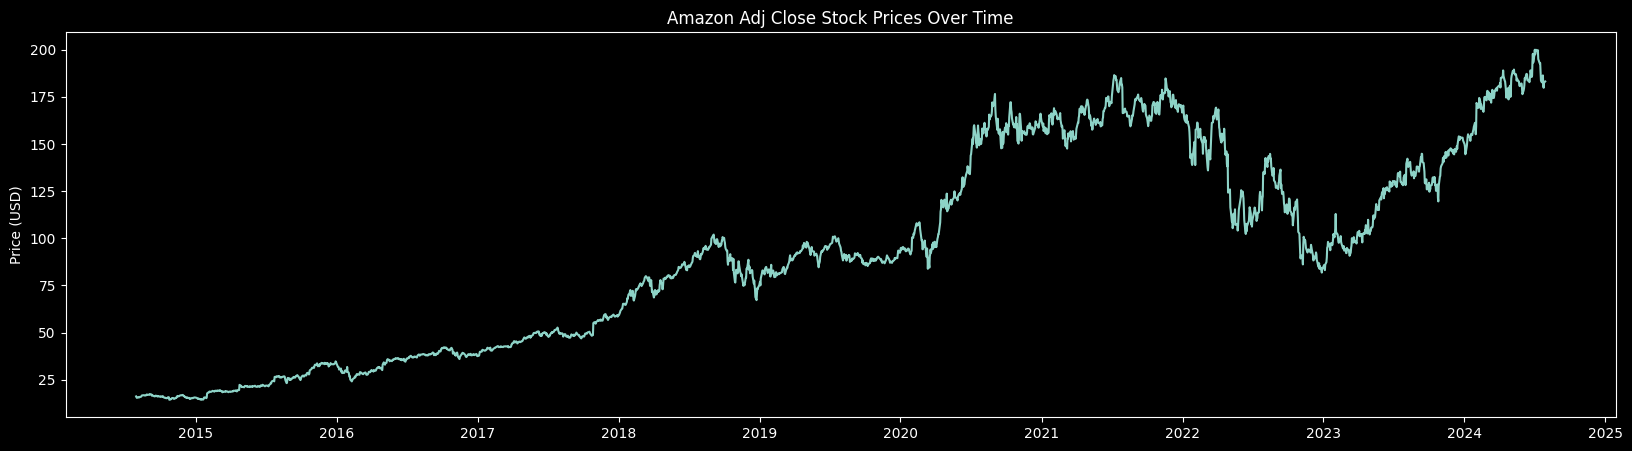

In [158]:
graph_over_time(amzn_dataframe, 'Date', 'Adj Close', ylabel = 'Price (USD)', title = 'Amazon Adj Close Stock Prices Over Time')

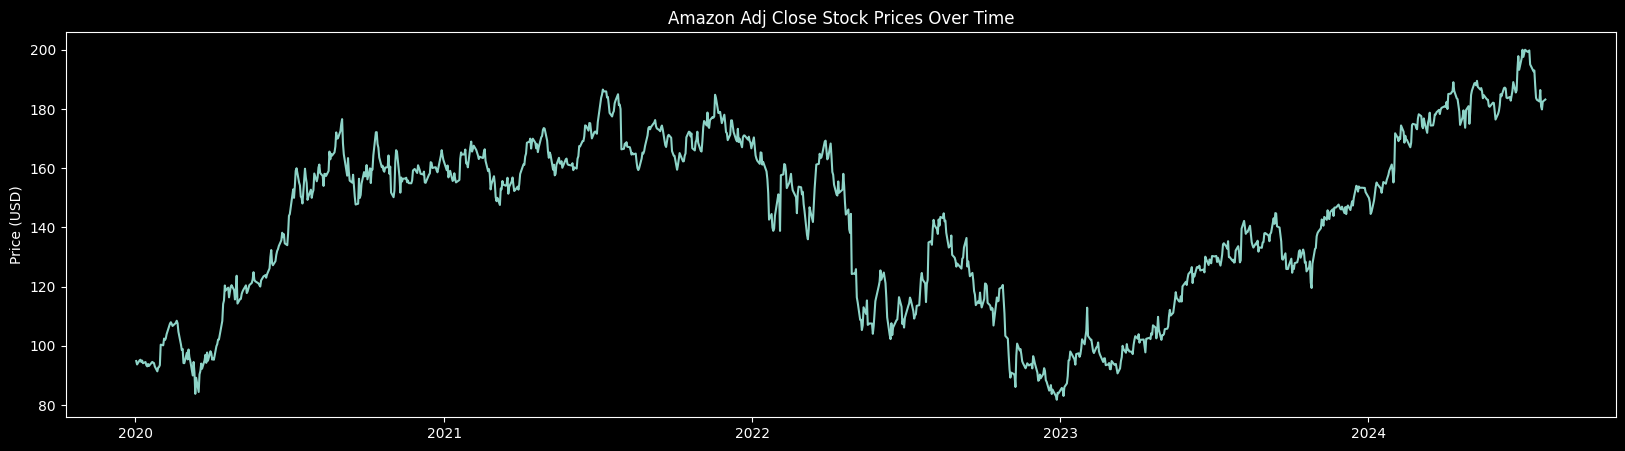

In [159]:
graph_over_time(amzn_dataframe, 'Date', 'Adj Close', start_date='2020-01-01', ylabel = 'Price (USD)', title = 'Amazon Adj Close Stock Prices Over Time')